In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = '/Users/vijeethvj8/Downloads/spam.csv'
df = pd.read_csv(file,encoding='ISO-8859-1')

print(df.head())
print(df.columns)


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [5]:
dfn = df[['v1','v2']]
dfn.columns = ['Label','Email']
print(dfn.head())
print(dfn.shape)


  Label                                              Email
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
(5572, 2)


In [7]:
print(dfn.isnull().sum())

Label    0
Email    0
dtype: int64


In [9]:
print(dfn.duplicated().sum())

403


In [11]:
dfn = dfn.drop_duplicates()
print(dfn.shape)


(5169, 2)


In [13]:
dfn['Label'] = dfn['Label'].map({'ham' : 0 , 'spam' : 1})
print(dfn.head())


   Label                                              Email
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [15]:
dfn['Email'] = dfn['Email'].str.strip().str.title()



In [17]:
import string

def clean(mail):
    exclude = set(string.punctuation)
    mail = mail.lower()
    mail = ''.join(ch for ch in mail if ch not in exclude)
    return mail

dfn['Email'] = dfn['Email'].apply(clean)
print(dfn.head())


   Label                                              Email
0      0  go until jurong point crazy available only in ...
1      0                            ok lar joking wif u oni
2      1  free entry in 2 a wkly comp to win fa cup fina...
3      0        u dun say so early hor u c already then say
4      0  nah i dont think he goes to usf he lives aroun...


PART 2

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with a max of 3000 features
tfidf = TfidfVectorizer(max_features=3000)

# Apply TF-IDF transformation
x = tfidf.fit_transform(dfn['Email']).toarray()

# Target variable
y = dfn['Label']

# Check the shape of the feature matrix
print(f"TF-IDF Matrix Shape: {x.shape}")


TF-IDF Matrix Shape: (5169, 3000)


In [24]:
from sklearn.model_selection import train_test_split

# 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape of the splits
print(f"Training Set: {x_train.shape}, Testing Set: {x_test.shape}")


Training Set: (3618, 3000), Testing Set: (1551, 3000)


In [26]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(x_train, y_train)


MultinomialNB()

PART 3

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = nb_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97

Confusion Matrix:
 [[1331    0]
 [  49  171]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1331
           1       1.00      0.78      0.87       220

    accuracy                           0.97      1551
   macro avg       0.98      0.89      0.93      1551
weighted avg       0.97      0.97      0.97      1551



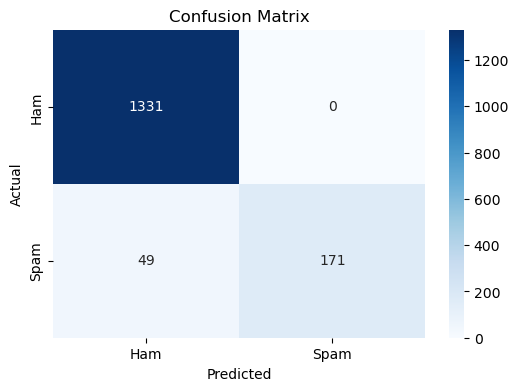

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


PART 4

In [113]:
# Convert y_test to a pandas Series without using index
y_test_series = pd.Series(y_test)

# Identify misclassified indices
misclassified_indices = y_test_series[y_test_series != y_pred].index

# Extract misclassified samples using the indices from the original dataset (dfn)
# We use the same indices as `x_test` and `y_test`
misclassified_samples = dfn.iloc[misclassified_indices]

# Display a few misclassified samples
for i in range(min(5, len(misclassified_samples))):
    print(f"Message: {misclassified_samples['Email'].iloc[i]}")
    print(f"True Label: {misclassified_samples['Label'].iloc[i]}, Predicted Label: {y_pred[i]}\n")


Message: ffffffffff alright way meet sooner
True Label: 0, Predicted Label: 0

Message: urgent ur award complimentari trip eurodisinc trav acoentry41 å£1000 claim txt di 87121 186å£150morefrmmob shracomorsglsuplt10 ls1 3aj
True Label: 1, Predicted Label: 0

Message: new address applespairsal malarki
True Label: 0, Predicted Label: 0

Message: ye see ya dot
True Label: 0, Predicted Label: 0

Message: kkgoodstudi well
True Label: 0, Predicted Label: 0



PART 5

In [115]:
import gensim
from gensim.models import Word2Vec

# Prepare the data for Word2Vec
# Convert the text to a list of words for Word2Vec
tokenized_messages = [msg.split() for msg in dfn['Email']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_messages, vector_size=100, window=5, min_count=2, sg=1, epochs=10)

# Example: Get vector for a word
print(word2vec_model.wv['urgent'])  # Check vector for a word


[-0.1228011  -0.12821634 -0.05070589 -0.19258833  0.29158103 -0.38489535
 -0.00906734  0.43701673  0.25198314 -0.06944662  0.12697239 -0.03142895
 -0.02267881 -0.10380126  0.11135966  0.1062633  -0.22713065 -0.34445697
 -0.01509194  0.04793232  0.02003907  0.53265935  0.05823865 -0.63797826
  0.19238086  0.15328819 -0.6010676  -0.15135822 -0.36059508 -0.04024718
  0.5490188   0.23303166  0.44506705 -0.15326129 -0.11708175  0.6206718
  0.18538083 -0.3186361  -0.2963398  -0.36841726  0.4605544  -0.50910187
 -0.09365974 -0.30857155  0.63249505  0.45555326 -0.18207397  0.26922086
  0.55008125  0.3980571   0.22510229 -0.17774478 -0.1705971  -0.07978398
 -0.45947486 -0.08395924  0.57612425  0.07836881 -0.531084    0.52301604
  0.4621071   0.19490498  0.14466026 -0.5904375  -0.17765792  0.23212062
 -0.13699022  0.07398959 -0.18817765  0.43063045 -0.20439817 -0.30628675
  0.02778403  0.06589135  0.20340917 -0.5636791   0.08933581 -0.27380374
 -0.33095583 -0.48337787 -0.41865632  0.15397888 -0.

In [117]:
import numpy as np

def get_avg_word_vector(words, model):
    """ Calculate the average word vector for a list of words """
    valid_words = [word for word in words if word in model.wv]
    if len(valid_words) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[valid_words], axis=0)

# Apply the function to all emails
w2v_features = np.array([get_avg_word_vector(msg.split(), word2vec_model) for msg in dfn['Email']])

# Check the shape of the resulting feature matrix
print(f"Shape of Word2Vec Feature Matrix: {w2v_features.shape}")


Shape of Word2Vec Feature Matrix: (5169, 100)


In [121]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Combine features for models that can handle both TF-IDF and Word2Vec features
combined_features = np.hstack([x, w2v_features])

# Train-Test Split
x_train_comb, x_test_comb, y_train_comb, y_test_comb = train_test_split(combined_features, y, test_size=0.3, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression()

# Only use TF-IDF features for Naive Bayes to avoid negative value error
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

# Voting Classifier (Excluding Naive Bayes for combined features)
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model)
], voting='soft')

# Train the ensemble model
ensemble_model.fit(x_train_comb, y_train_comb)

# Predict using the ensemble model
ensemble_pred = ensemble_model.predict(x_test_comb)


Naive Bayes Accuracy (TF-IDF only): 0.97
Ensemble Model Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1331
           1       0.96      0.88      0.91       220

    accuracy                           0.98      1551
   macro avg       0.97      0.94      0.95      1551
weighted avg       0.98      0.98      0.98      1551



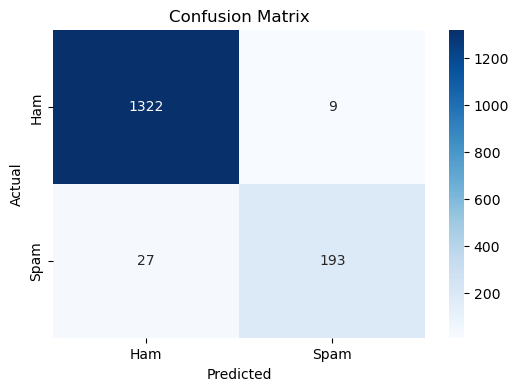

In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy for Naive Bayes (using only TF-IDF)
nb_accuracy = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy (TF-IDF only): {nb_accuracy:.2f}")

# Accuracy for the Ensemble Model (RF + LR with combined features)
ensemble_accuracy = accuracy_score(y_test_comb, ensemble_pred)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}")

# Classification Report for the Ensemble Model
print("\nClassification Report:\n", classification_report(y_test_comb, ensemble_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_comb, ensemble_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


PART 6

In [134]:
# app.py

import streamlit as st
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download NLTK data (only run once)
nltk.download('stopwords')

# Preprocessing function
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = [ps.stem(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming the data is in the `dfn` DataFrame
# Re-train the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(dfn['Email'])
y = dfn['Label']

# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

# Save the models and vectorizer
with open('/Users/vijeethvj8/Downloads/Elevateme/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('/Users/vijeethvj8/Downloads/Elevateme/rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('/Users/vijeethvj8/Downloads/Elevateme/lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('/Users/vijeethvj8/Downloads/Elevateme/nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

print("Models and vectorizer saved successfully!")


print("All models saved successfully!")




# Streamlit UI
st.title("Spam Detection App")
st.write("Enter a message to classify it as Ham or Spam")

# User input
user_input = st.text_input("Message")

if st.button("Classify"):
    # Preprocess input
    processed_input = preprocess(user_input)
    input_tfidf = tfidf.transform([processed_input])

    # Predict using each model
    nb_pred = nb_model.predict(input_tfidf)
    rf_pred = rf_model.predict(input_tfidf)
    lr_pred = lr_model.predict(input_tfidf)

    # Majority Voting
    combined_pred = np.array([nb_pred[0], rf_pred[0], lr_pred[0]])
    final_prediction = np.bincount(combined_pred).argmax()

    # Output result
    result = "Spam" if final_prediction == 1 else "Ham"
    st.write(f"Prediction: {result}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vijeethvj8/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2025-05-14 19:55:01.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.189 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-14 19:55:01.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignore

Models and vectorizer saved successfully!
All models saved successfully!


In [136]:
# Verify that models are loaded
try:
    print("Random Forest Model:", rf_model)
    print("Logistic Regression Model:", lr_model)
    print("Naive Bayes Model:", nb_model)
except Exception as e:
    st.error(f"Model loading error: {e}")


Random Forest Model: RandomForestClassifier(random_state=42)
Logistic Regression Model: LogisticRegression()
Naive Bayes Model: MultinomialNB()
